In [17]:
## Convolutional Neural Network
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import transforms


train_data = datasets.FashionMNIST(root="datas",
                                   download=True,
                                   train=True,
                                   transform=transforms.ToTensor()
                                   )


test_data = datasets.FashionMNIST(root="datas",
                                  download=True,
                                  train=False,
                                  transform=transforms.ToTensor()
                                  )
        

In [18]:
len(train_data), len(test_data)

train_data[0]


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [19]:
len(train_data.classes),  train_data[0][0].shape

(10, torch.Size([1, 28, 28]))

In [20]:
class FashinMnistV2(nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
               in_channels= input_shape,
               out_channels=hidden_unit,
               stride=1,
               padding=1,
               kernel_size=3
            ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      stride=1,
                      padding=1,
                      kernel_size=3
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
                 
        )
        
        self.conv_block_2 = nn.Sequential(
              nn.Conv2d(
               in_channels= hidden_unit,
               out_channels=hidden_unit,
               stride=1,
               padding=1,
               kernel_size=3
            ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      stride=1,
                      padding=1,
                      kernel_size=3
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*7*7 ,   ## resolve this sachin????
                      out_features= output_shape)
            
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        # print("Shape conv layer 1" , x.shape)
        x = self.conv_block_2(x)
        # print("Shape conv layer 2" , x.shape)
        x = self.classifier(x)
        # print("Shape classifier" , x.shape)

        
        return x


In [21]:
# Instatiate our model 

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
model_2 = FashinMnistV2(input_shape=1,
                        hidden_unit=10,
                        output_shape=len(train_data.classes)).to(device)



In [22]:
# creat an image tensor of batch 32 for testing

images = torch.rand(32,3,64,64)
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [23]:
# create a conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                            out_channels=64,
                            kernel_size=3,
                            stride=1,
                            padding=1)


image_after_conv_layer  = conv_layer(test_image)
image_after_conv_layer.shape

torch.Size([64, 64, 64])

In [24]:
# creat a maxpool layer
max_layer = nn.MaxPool2d(kernel_size=2)

max_layer(image_after_conv_layer).shape

torch.Size([64, 32, 32])

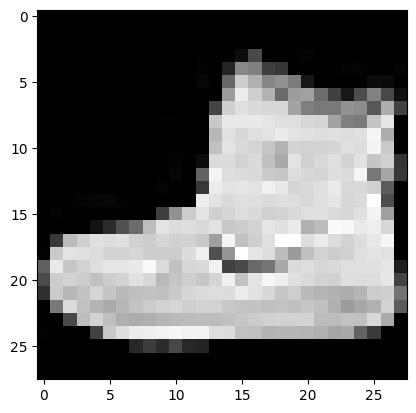

In [25]:
# get a fashion image
import matplotlib.pyplot as plt

image = train_data[0][0]

plt.imshow(image.squeeze(), cmap="gray")

In [26]:
image = image.type(torch.float)

In [27]:
model_2(image.unsqueeze(dim=1))


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

In [28]:
torch.__version__

'2.6.0'

In [29]:
image.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [30]:
# Add loss and optimizer
from helper import  accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [31]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_data, shuffle=True, batch_size=32)
test_data_loader = DataLoader(test_data, batch_size=32)

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer 
from tqdm.auto import tqdm
from train_eval_batch import train_step, test_step

start_time = timer()

epochs = 4

for epoch in tqdm(range(epochs)):
    print(f"Epochs : {epoch} \n----")
    
    train_step(model=model_2,
               data_loader=train_data_loader,
               optimizer=optimizer,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               )
    
    test_step(model=model_2,
              data_loader=test_data_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
    

end_time = timer()

print(f"Total time taken : {end_time-start_time}")
    
    
    
    
    



  0%|          | 0/4 [00:00<?, ?it/s]

Epochs : 0 
----
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Train loss : 0.5971809029579163 | Train Acc : 0.05 


 25%|██▌       | 1/4 [00:17<00:51, 17.31s/it]

Test loss : 0.39271458983421326 |  Test acc : 86.07228434504792
Epochs : 1 
----
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Train loss : 0.3610095679759979 | Train Acc : 0.043333333333333335 


 50%|█████     | 2/4 [00:35<00:35, 17.63s/it]

Test loss : 0.35492029786109924 |  Test acc : 86.88099041533546
Epochs : 2 
----
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Train loss : 0.32422730326652527 | Train Acc : 0.04833333333333333 


 75%|███████▌  | 3/4 [00:52<00:17, 17.64s/it]

Test loss : 0.32574188709259033 |  Test acc : 88.11900958466454
Epochs : 3 
----
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Train loss : 0.3016802668571472 | Train Acc : 0.04666666666666667 


100%|██████████| 4/4 [01:12<00:00, 18.02s/it]

Test loss : 0.328076034784317 |  Test acc : 87.96924920127796
Total time taken : 72.06735833400012


In [ ]:
# evaluate the model

def make_predition(model:nn.Module,
                   data: list,
                   device = device):
    
    
    return 0
    

In [70]:
model_2.eval()
ims = train_data[8][0].unsqueeze(dim=1)
print("Label is : ",train_data[8][1] )

with torch.inference_mode():
    logits = model_2(ims).squeeze()
    d = torch.argmax(logits, dim=0)
    print(d)

Label is :  5
tensor(5)


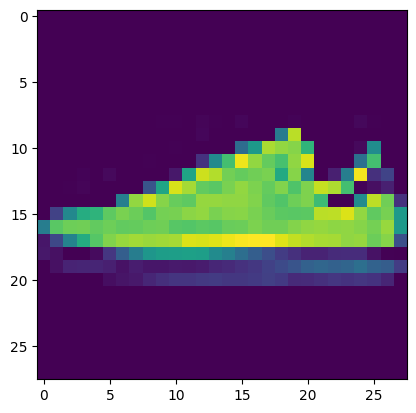

In [60]:
plt.imshow(ims.squeeze())

In [54]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [74]:
# do apredition on entire test dataset
model_2.eval()

pred_list = []

with torch.inference_mode():
    for X,y in tqdm(test_data_loader):
        logits = model_2(X)
        preds = torch.softmax(logits, dim=0).argmax(dim=1)
        pred_list.append(preds)
        
len(pred_list)

100%|██████████| 313/313 [00:00<00:00, 496.31it/s]


313

In [75]:
pred_list

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
         1, 6, 6, 3, 9, 3, 8, 8]),
 tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 4, 6, 6, 6, 5, 8, 2, 2,
         8, 4, 8, 0, 7, 7, 8, 5]),
 tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
         0, 6, 5, 3, 6, 7, 1, 8]),
 tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
         0, 0, 9, 9, 3, 0, 8, 4]),
 tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 6, 4, 4,
         1, 4, 5, 6, 4, 7, 9, 3]),
 tensor([7, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 0, 8, 1, 0, 9, 3, 6,
         7, 8, 8, 4, 4, 7, 1, 2]),
 tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
         1, 6, 7, 2, 8, 5, 6, 0]),
 tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 6, 9, 2, 2, 8, 6, 4,
         6, 4, 9, 7, 3, 5, 5, 4]),
 tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 

In [99]:
preds = (torch.cat(pred_list))

In [83]:
import torchmetrics
import mlxtend

In [88]:
image, labels = test_data[0]

labels

9

10000

In [101]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


cmformat = ConfusionMatrix(num_classes=len(train_data.classes), task="multiclass")

cmformat_tensor = cmformat(preds, test_data.targets)

cmformat_tensor




tensor([[704,   3,  31,  73,   9,   0, 179,   0,   1,   0],
        [ 20, 886,   4,  67,  14,   2,   7,   0,   0,   0],
        [ 19,   3, 722,  17, 131,   0, 103,   0,   5,   0],
        [ 22,  11,  22, 883,  28,   0,  25,   0,   6,   3],
        [ 13,   5,  99,  57, 702,   0, 123,   0,   1,   0],
        [ 12,   1,   7,   8,   0, 813,   6,  53,  79,  21],
        [108,   8,  94,  69,  78,   0, 641,   0,   2,   0],
        [  0,   0,   0,   0,   0,  36,   0, 914,  11,  39],
        [ 23,   1,  25,  13,   7,  13,  44,  10, 860,   4],
        [  2,   1,   0,   0,   0,  15,   9,  85,  34, 854]])

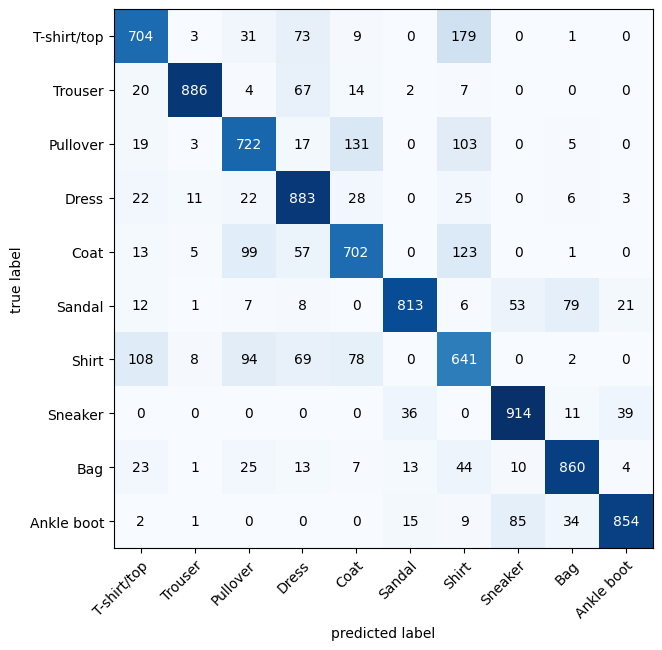

In [107]:
fig, ax = plot_confusion_matrix(conf_mat=cmformat_tensor.numpy(),
                      class_names=test_data.classes,
                      figsize=(10,7))